ROC Curves of SEE Classify HOF

In [1]:
# Path hack so that we can import see library.
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [2]:
population_datasets = [
    "../0802_sklearn_data/circles_population_100_100.csv",
    "../0802_sklearn_data/linearly_separable_population_100_100.csv",
    "../0802_sklearn_data/moons_population_100_100.csv",
    "../0730_dhahri_simple_data/pop_size_100/dhahri_2019_population_100_100.csv"
]

hof_datasets = [
    "../0802_sklearn_data/circles_hof_100_100.csv",
    "../0802_sklearn_data/linearly_separable_hof_100_100.csv",
    "../0802_sklearn_data/moons_hof_100_100.csv",
    "../0730_dhahri_simple_data/pop_size_100/dhahri_2019_hof_100_100.csv"
]

In [3]:
def extract_hof(
    hof_filepath, num_gen=100, pop_size=100, num_trials=30, hof_size=10,
):
    import pandas as pd

    hof_df = pd.read_csv(hof_filepath, header=None, delimiter=";")
    return hof_df

In [4]:
df = extract_hof(hof_datasets[0])

In [5]:
df

,0,1,2,3
0,0,0,0.050,"['K Nearest Neighbors', 'identity', 1e-06, 100..."
1,0,1,0.075,"['K Nearest Neighbors', 'logistic', 0.001, 100..."
2,0,2,0.075,"['K Nearest Neighbors', 'logistic', 0.1, 10000..."
3,0,3,0.100,"['K Nearest Neighbors', 'identity', 0.01, 1000..."
4,0,4,0.100,"['Gaussian Process', 'identity', 1e-06, 100000..."
...,...,...,...,...
100995,100,5,0.025,"['Gaussian Naive Bayes', 'logistic', 0.01, 100..."
100996,100,6,0.025,"['Gaussian Naive Bayes', 'logistic', 0.01, 100..."
100997,100,7,0.025,"['Gaussian Naive Bayes', 'logistic', 0.01, 100..."
100998,100,8,0.025,"['Gaussian Naive Bayes', 'logistic', 0.01, 100..."


In [6]:
# extract where 0 == 100
hof = df.loc[df[0] == 100][3].to_numpy()

In [7]:
def algo_vec_to_clf(algo_vec):
    from see.classifiers import Classifier
    if(isinstance(algo_vec, str)):
        algo_vec = eval(algo_vec)
    clf = Classifier(paramlist=algo_vec).create_clf()
    return clf

all_clfs = list(map(algo_vec_to_clf, hof))

In [8]:
all_clfs

[GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianNB(var_smoothing=1),
 GaussianN

In [9]:
map?

In [10]:
# convert strings into algo
from see.classifiers import Classifier

In [11]:
clf = Classifier(paramlist=eval(hof[0])).create_clf()

In [12]:
hof[0]

"['Gaussian Naive Bayes', 'relu', 0.01, 100, 0.1, 'rbf', 1e-05, 30, 600, 500, 16, 'adam', 1]"

In [13]:
clf

GaussianNB(var_smoothing=1)

In [14]:
# Returns [training_fitnes, algo_vec]
import re
def extract_best(file):
    # figure out last generation
    file = open(file, "r")
    best = None
    for line in file:
        pattern = "#BEST "
        if re.search(pattern, line):
            best = line
    best = best.split(" ", 1)[1]
    return eval(best)

def algo_vec_to_clf(algo_vec):
    from see.classifiers import Classifier
    if(isinstance(algo_vec, str)):
        algo_vec = eval(algo_vec)
    clf = Classifier(paramlist=algo_vec).create_clf()
    return clf

def extract_random_state(file):
    file = open(file, "r")

    random_state = None

    for line in file:

        pattern = "# random_state int:"

        if re.search(pattern, line):
            random_state = int(line.split(":")[1])

    file.close()
    return random_state

In [29]:
file_name = "../10hours/breast_cancer/slurm-45005844_{}.out"
filepath_templates = [
    "../10hours/breast_cancer/slurm-45005844_{}.out",
    "../10hours/phoneme/slurm-45006627_{}.out",
]

In [16]:
def extract_data(file):
    rs = extract_random_state(file)
    [training_fitness, algo_vec] = extract_best(file)
    clf = algo_vec_to_clf(algo_vec)
    return [rs, training_fitness, clf]

In [17]:
# This function trains the classifier as a side-effect
def retrain_models(rs, clf):
    #from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_score
    from sklearn.preprocessing import StandardScaler
    from see.classifier_helpers.fetch_data import fetch_wisconsin_data
    from see.classifier_helpers import helpers


    X, y = fetch_wisconsin_data()
    X = StandardScaler().fit_transform(X)
    temp = helpers.generate_train_test_set(X, y, test_size=0.25, random_state=rs, stratify=y)
    validation_set = temp.testing_set
    training_set = temp.training_set
    clf.fit(training_set.X, training_set.y)
    #return cross_val_score(clf, training_set.X, training_set.y, cv=10).mean()
    

In [31]:
file_lists = [map(lambda i: template.format(i+1), [*range(30)]) for template in filepath_templates]
file_lists = [list(m) for m in file_lists]

In [34]:
best_matrix = [map(extract_data, file_list) for fl in file_lists]
best_matrix = [list(m) for m in best_matrix]

In [35]:
best_matrix

[[[37572,
   0.01417497231450715,
   MLPClassifier(activation='logistic', alpha=0.1, max_iter=700)],
  [34433,
   0.01638981173864895,
   MLPClassifier(activation='tanh', alpha=0.1, max_iter=100, solver='lbfgs')],
  [98294, 0.01417497231450715, MLPClassifier(alpha=1e-05, max_iter=800)],
  [39073,
   0.016334440753045465,
   MLPClassifier(activation='tanh', max_iter=100)],
  [67706,
   0.01638981173864895,
   MLPClassifier(activation='logistic', alpha=1e-06)],
  [86281, 0.01866002214839424, LogisticRegression(C=10, max_iter=800)],
  [8083,
   0.02591362126245844,
   MLPClassifier(activation='identity', alpha=0.1, max_iter=300, solver='sgd')],
  [55534,
   0.014119601328903664,
   MLPClassifier(alpha=0.1, max_iter=400, solver='lbfgs')],
  [50908,
   0.011683277962347693,
   MLPClassifier(activation='identity', alpha=1e-06, max_iter=800, solver='sgd')],
  [36651, 0.01644518272425244, MLPClassifier(alpha=0.01)],
  [58532,
   0.023643410852713154,
   MLPClassifier(activation='identity', alp

In [18]:
file_list = list((map(lambda i: file_name.format(i+1), [*range(30)])))
best_data = list(map(extract_data, file_list))
best_data

[[37572,
  0.01417497231450715,
  MLPClassifier(activation='logistic', alpha=0.1, max_iter=700)],
 [34433,
  0.01638981173864895,
  MLPClassifier(activation='tanh', alpha=0.1, max_iter=100, solver='lbfgs')],
 [98294, 0.01417497231450715, MLPClassifier(alpha=1e-05, max_iter=800)],
 [39073, 0.016334440753045465, MLPClassifier(activation='tanh', max_iter=100)],
 [67706,
  0.01638981173864895,
  MLPClassifier(activation='logistic', alpha=1e-06)],
 [86281, 0.01866002214839424, LogisticRegression(C=10, max_iter=800)],
 [8083,
  0.02591362126245844,
  MLPClassifier(activation='identity', alpha=0.1, max_iter=300, solver='sgd')],
 [55534,
  0.014119601328903664,
  MLPClassifier(alpha=0.1, max_iter=400, solver='lbfgs')],
 [50908,
  0.011683277962347693,
  MLPClassifier(activation='identity', alpha=1e-06, max_iter=800, solver='sgd')],
 [36651, 0.01644518272425244, MLPClassifier(alpha=0.01)],
 [58532,
  0.023643410852713154,
  MLPClassifier(activation='identity', alpha=0.1, max_iter=800, solver='s

In [19]:
# retrain classifiers
for arr in best_data:
    retrain_models(arr[0], arr[2])

/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_

In [20]:
# revalidate models
# trainined clf
def revalidate_models(rs, clf):
    #from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_score
    from sklearn.preprocessing import StandardScaler
    from see.classifier_helpers.fetch_data import fetch_wisconsin_data
    from see.classifier_helpers import helpers


    X, y = fetch_wisconsin_data()
    X = StandardScaler().fit_transform(X)
    temp = helpers.generate_train_test_set(X, y, test_size=0.25, random_state=rs, stratify=y)
    validation_set = temp.testing_set
    training_set = temp.training_set
    return clf.score(validation_set.X, validation_set.y)    

In [22]:
import numpy as np
validation_scores = 1 - np.array(list(map(lambda arr: revalidate_models(arr[0], arr[2]), best_data)))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


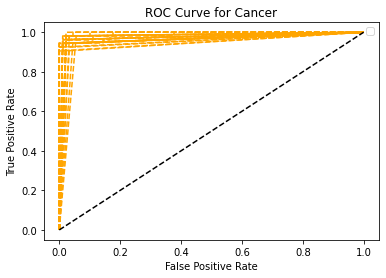

In [23]:
#track auc_scores
import numpy as np
auc_scores = np.zeros(30)

# ROC Curves
# calculate roc curves?
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

for i, arr in enumerate(best_data):
    rs = arr[0]
    trained_clf = arr[2]
    
    #from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_score
    from sklearn.preprocessing import StandardScaler
    from see.classifier_helpers.fetch_data import fetch_wisconsin_data
    from see.classifier_helpers import helpers

    X, y = fetch_wisconsin_data()
    X = StandardScaler().fit_transform(X)
    
    temp = helpers.generate_train_test_set(X, y, test_size=0.25, random_state=rs, stratify=y)
    
    X_test = temp.testing_set.X
    y_test = temp.testing_set.y
    
    # see if changes when using other code with sklearn
    
    if hasattr(trained_clf, "predict_prob"):
        pred_prob = trained_clf.predict_proba(X_test)
        auc_score_cancer = roc_auc_score(y_test, pred_prob[:,1])
        fpr_cancer, tpr_cancer, thresh_cancer = roc_curve(y_test, pred_prob[:,1],pos_label=1)
    elif hasattr(trained_clf, "decision_function"):
        decisions = trained_clf.decision_function(X_test)
        auc_score_cancer = roc_auc_score(y_test, decisions)
        fpr_cancer, tpr_cancer, thresh_cancer = roc_curve(y_test, decisions,pos_label=1)
    else:
        predictions = trained_clf.predict(X_test)
        auc_score_cancer = roc_auc_score(y_test, predictions)
        fpr_cancer, tpr_cancer, thresh_cancer = roc_curve(y_test, predictions,pos_label=1)

    auc_scores[i] = auc_score_cancer
    # roc & auc
    #plt.plot(fpr_cancer, tpr_cancer, linestyle='--', color='orange',label= 'Breast Cancer TPOT')
    plt.plot(fpr_cancer, tpr_cancer, linestyle='--', color='orange')
    #print('{}; {}'.format(auc_score_cancer, rs))

plt.title("ROC Curve for Cancer")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='best')

# roc curve for tpr = fpr 
rand_prob= [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, rand_prob,pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

plt.show()

In [24]:
auc_scores

array([0.97002096, 0.94171908, 0.94947589, 0.96226415, 0.97002096,
       0.98993711, 0.960587  , 0.95283019, 0.97945493, 0.960587  ,
       0.96614256, 0.97945493, 0.99874214, 0.98888889, 0.960587  ,
       0.97169811, 0.97002096, 0.97557652, 0.94559748, 0.97557652,
       0.96278826, 0.96614256, 0.99643606, 0.98501048, 0.97169811,
       0.97002096, 0.97389937, 0.99056604, 0.96614256, 0.96614256])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0


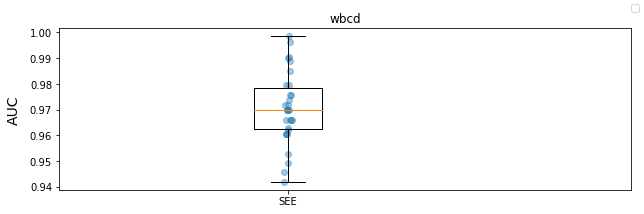

In [28]:
# box plot AUC scores
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(9,3))
labels = ['AUC']

ax = axs

ax.set_title('wbcd')

#ax.set_title(ds_names[i])
data = [auc_scores]
bp1 = ax.boxplot(data, positions=[1], widths=0.6)
for j in range(1):
    jitter = np.random.normal(1+j, 0.02, size=len(data[j]))

    ax.scatter(jitter, data[j], alpha=0.4) #, label=labels[j])

ax.set_xticks([1])
ax.set_xticklabels(['SEE'])

if(i == 0):
    print(i)
    # insert SEE Classify performance

# Handle legend
if i == 0:
    ax.legend()
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    ax.get_legend().remove()
#else:
    #ax.get_legend().remove()
        
fig.supylabel('AUC', fontsize=14)
#fig.suptitle('Training and Validation Performance', fontsize=18)
# set axes limits and labels
plt.xlim(-1,4)
#plt.legend()
plt.tight_layout()

plt.show()